100%|██████████| 30/30 [04:32<00:00,  9.09s/it]


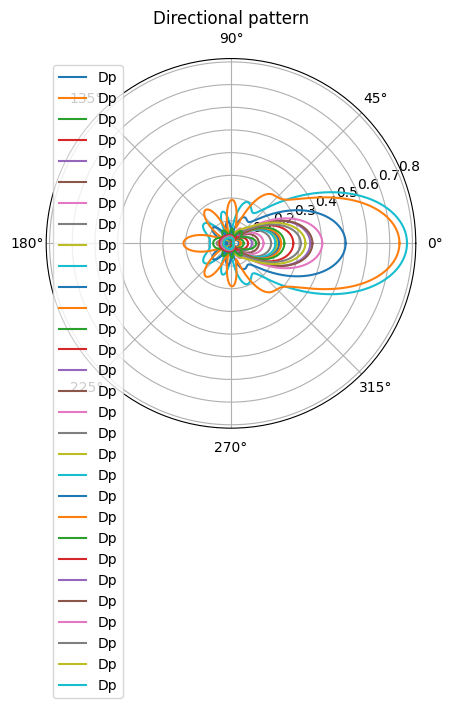

In [1]:

import better 

import numpy as np
from solver_for_Pocklington_equation import directional_pattern
from tqdm import tqdm

#* Define constants
light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
freq_min, freq_max, df = 130e6, 160e6, 1e6
n = int((freq_max-freq_min)/df)
frequency = np.linspace(freq_min, freq_max, n)
P_total_frame = []
phi_frame = []
I = []
for i in tqdm(range(len(frequency))):
    omega = 2 * np.pi * frequency[i]
    incident_voltage = 10

    #* set geometry of antenna
    element_position = np.array([0.0, 0.312, 0.447, 0.699, 1.05, 1.482, 1.986, 2.553, 3.168])
    element_length = np.array([1.038, 0.955, 0.956, 0.932, 0.916, 0.906, 0.897, 0.891, 0.887])
    wire_radius = 3.175e-3
    source_position = np.array([[0,element_position[1],0]], dtype = float)

    #! Spatial resolution
    delta_z = light_speed / frequency[i] / 5e2

    R, R_block, element_num, incident_field, impedance, current, current_block, P_total, phi = directional_pattern (frequency[i], delta_z, incident_voltage, element_position, element_length, wire_radius, source_position)
    P_total_frame.append(P_total)
    phi_frame.append(phi)
    I.append(current_block)

MovieWriter Pillow unavailable; using Pillow instead.


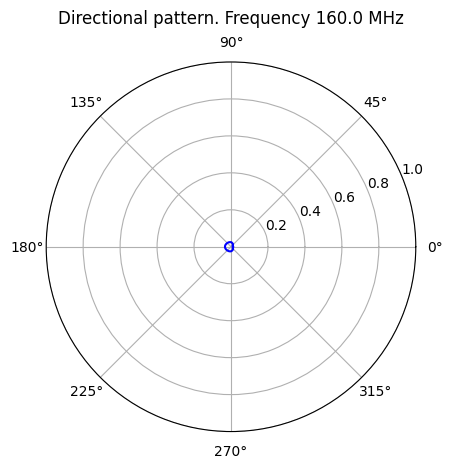

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
line, = ax.plot([], [], color='blue')
ax.set_ylim(0, 1)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(phi, P_total_frame[frame])
    ax.set_title(f'Directional pattern. Frequency {round(frequency[frame]/1e6,1)} MHz', va='bottom')  # Установка заголовка с номером кадра
    return line,

ani = FuncAnimation(fig, update, frames=len(P_total_frame), init_func=init, blit=True)
ani.save('Animation of changing frequency.gif', writer='Pillow', fps=2)